<a href="https://colab.research.google.com/github/debg48/pytorch_for_beginners/blob/main/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression


In [1]:
import torch 
import torch.nn as nn 
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

We generate our data using datasets

In [2]:
X_numpy,Y_numpy = datasets.make_regression(n_samples=1000,n_features=1,noise=20,random_state=1)

Convert numpy to tensor

In [3]:
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

Make Y a column vector

In [5]:
Y.shape

torch.Size([1000])

In [6]:
Y=Y.view(Y.shape[0],1)

In [7]:
Y.shape

torch.Size([1000, 1])

In [8]:
n_samples,n_features=X.shape

Specify the input and output size of model

In [9]:
input_size = n_features
output_size = 1

## Model

In [11]:
model = nn.Linear(input_size,output_size)

learning rate

In [12]:
lr =0.01

loss and optimizer

In [13]:
mse=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr)

training loop


In [14]:
num_epochs = 100

In [15]:
for epoch in range(num_epochs):

  # forward pass
  y_preds=model(X)

  # loss
  loss = mse(y_preds,Y)

  # backward pass
  loss.backward()

  # weight update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch : {epoch + 1} -> loss : {loss.item():.4f}')


epoch : 10 -> loss : 1414.5657
epoch : 20 -> loss : 1087.1372
epoch : 30 -> loss : 865.6670
epoch : 40 -> loss : 715.8256
epoch : 50 -> loss : 614.4195
epoch : 60 -> loss : 545.7740
epoch : 70 -> loss : 499.2932
epoch : 80 -> loss : 467.8124
epoch : 90 -> loss : 446.4855
epoch : 100 -> loss : 432.0338


Plotting Results

In [16]:
preds = model(X).detach().numpy()

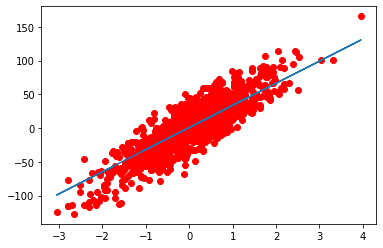

In [17]:
plt.plot(X_numpy,Y_numpy,'ro')
plt.plot(X_numpy,preds)
plt.show()